In [2]:
!pip install wordcloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Running setup.py clean for wordcloud
Failed to build wordcloud
    Running setup.py install for wordcloud: started
    Running setup.py install for wordcloud: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\nurha\.conda\envs\main_env\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\nurha\\AppData\\Local\\Temp\\pip-install-kl841vcn\\wordcloud_753bbf84cdab45f89d9c61a775e1b5ef\\setup.py'"'"'; __file__='"'"'C:\\Users\\nurha\\AppData\\Local\\Temp\\pip-install-kl841vcn\\wordcloud_753bbf84cdab45f89d9c61a775e1b5ef\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\nurha\AppData\Local\Temp\pip-wheel-dskfqnd2'
       cwd: C:\Users\nurha\AppData\Local\Temp\pip-install-kl841vcn\wordcloud_753bbf84cdab45f89d9c61a775e1b5ef\
  Complete output (20 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.wi

In [6]:
!conda install -c conda-forge wordcloud

^C


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import cv2

%matplotlib inline

In [2]:
df = pd.read_csv('justice-for-bella-tweets.csv')
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1512468409249898497,1512109506049757186,2022-04-09 00:32:23 Malay Peninsula Standard Time,2022-04-09,00:32:23,800,1496079307462123520,ra__viola,violapetrolo,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'isa_be_bella', 'name': 'isa'...",NaN,NaN,NaN,NaN
1,1512468403092697098,1512441547920494593,2022-04-09 00:32:22 Malay Peninsula Standard Time,2022-04-09,00:32:22,800,1227585601567961088,rxncore,ً,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'taylorjoyismo1', 'name': 'Un...",NaN,NaN,NaN,NaN
2,1512468403088416779,1512468403088416779,2022-04-09 00:32:22 Malay Peninsula Standard Time,2022-04-09,00:32:22,800,254291792,alison_conunal,Lady Vaga,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1512468396285247493,1512468396285247493,2022-04-09 00:32:20 Malay Peninsula Standard Time,2022-04-09,00:32:20,800,837320395,sonoladgr,DadR,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1512468392837529600,1512175104557527053,2022-04-09 00:32:19 Malay Peninsula Standard Time,2022-04-09,00:32:19,800,1374536249185341445,arimora38735858,Ari Morales,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'mimyregia', 'name': 'Myriam ...",NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [4]:
df = df['tweet']

In [5]:
text = " ".join(text for text in df)
text = text.split()
text = [i for i in text if i != '&amp;']
text = [i for i in text if 'http' not in i]
text = ' '.join([str(i) for i in text])

In [6]:
f = open('malay_stopwords.txt', 'r')
stopwords = f.read().split()
f = open('english_stopwords.txt', 'r')
stopwords.extend(f.read().split())

In [136]:
wcloud = WordCloud(collocations=False,
                    background_color='whitesmoke', 
                    stopwords=stopwords, 
                    colormap='copper',
                    width=1080,
                    height=1080,
                    prefer_horizontal = 0.8,
                    min_font_size = 4,
                    max_words = 600,
                    repeat=True
                  ).generate(text)

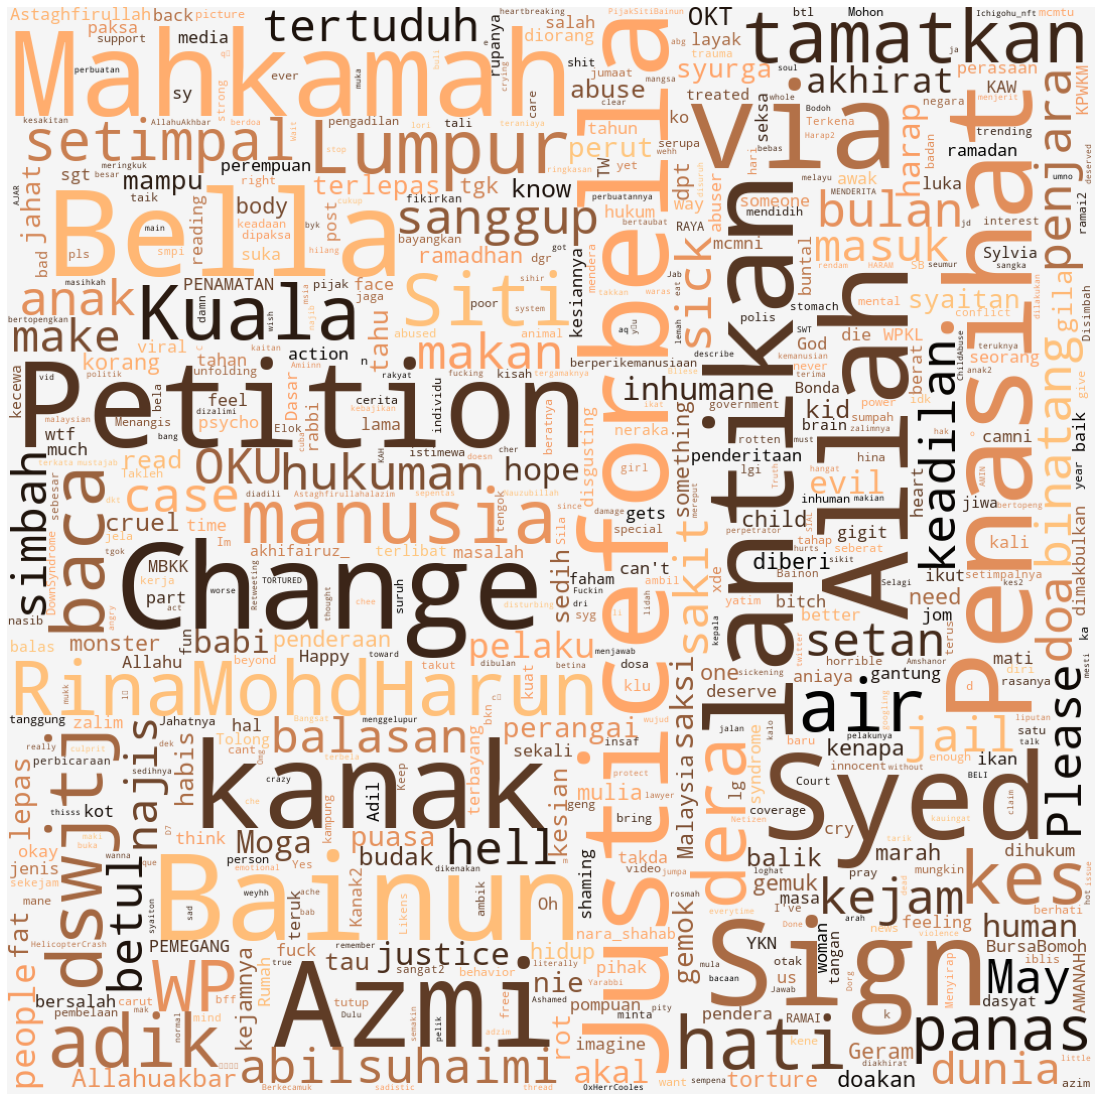

In [137]:
plt.figure(figsize=[20, 20])
plt.imshow(wcloud, interpolation=None)
plt.axis("off")
plt.show()

In [138]:
wcloud.to_file('v4.png')